# Conexión a BigQuery

In [5]:
import json
import os
from google.oauth2 import service_account
from google.cloud import bigquery

# Instanciar credenciales
bq_credentials = service_account.Credentials.from_service_account_info(
    json.loads(os.environ['GOOGLEYELP_SERVICE_ACCOUNT']))


client = bigquery.Client(credentials=bq_credentials, 
    project=bq_credentials.project_id)

# Importar librerías

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Yelp

## Business

In [23]:
sql_query = ('''SELECT *
                FROM pg-yelp-gmaps-389415.Yelp2.business
                ''')

df_business = client.query(sql_query).to_dataframe()

In [24]:
def assign_price_num(price):
    if price == 'S':
        return 1
    elif price == 'SS':
        return 2
    elif price == 'SSS':
        return 3
    elif price == 'SSSS':
        return 4
    else:
        return None

df_business['price_num'] = df_business['price'].apply(assign_price_num)

df_business.drop('price', axis=1, inplace=True)
df_business.drop('abierto', axis=1, inplace=True)
df_business.drop('longitude', axis=1, inplace=True)
df_business.drop('latitude', axis=1, inplace=True)
df_business.drop('business_id', axis=1, inplace=True)

df_business["num_of_reviews"] = pd.to_numeric(df_business["num_of_reviews"])
df_business.head()

,local_name,state,stars,num_of_reviews,rest_category,service,comment_2019,comment_2021,price_num
0,PJ Henry's Draft House,PA,1.0,6,Bar,Sin Dato,NaN,NaN,2.0
1,Margarita Mama's,FL,1.0,9,Bar,Sin Dato,NaN,NaN,2.0
2,Casper's Place,PA,1.0,9,Bar,Sin Dato,NaN,NaN,3.0
3,Rain Lounge,PA,1.5,6,Bar,Sin Dato,NaN,NaN,2.0
4,Springfield Inn,PA,1.5,6,Bar,"Takeout, Delivery",NaN,NaN,2.0


In [25]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25868 entries, 0 to 25867
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   local_name      25868 non-null  object 
 1   state           25868 non-null  object 
 2   stars           25868 non-null  object 
 3   num_of_reviews  25868 non-null  int64  
 4   rest_category   25868 non-null  object 
 5   service         25868 non-null  object 
 6   comment_2019    22587 non-null  float64
 7   comment_2021    22587 non-null  float64
 8   price_num       21537 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.8+ MB


## Checkin

In [11]:
sql_query = ('''SELECT *
                FROM pg-yelp-gmaps-389415.Yelp2.checkin
                ''')

df_checkin = client.query(sql_query).to_dataframe()

In [12]:
df_checkin["date"] = pd.to_datetime(df_checkin["date"])
df_checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,2021-05-25
1,--ARBQr1WMsTWiwOKOj-FQ,2015-03-06
2,--ARBQr1WMsTWiwOKOj-FQ,2015-07-08
3,--ARBQr1WMsTWiwOKOj-FQ,2015-11-07
4,--ARBQr1WMsTWiwOKOj-FQ,2017-12-02


In [13]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881636 entries, 0 to 3881635
Data columns (total 2 columns):
 #   Column       Dtype         
---  ------       -----         
 0   business_id  object        
 1   date         datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 59.2+ MB


## Reviews

In [34]:
sql_query = ('''SELECT *
                FROM pg-yelp-gmaps-389415.Yelp2.reviews
                ''')

df_reviews = client.query(sql_query).to_dataframe()

In [35]:
df_reviews.drop('opinion', axis=1, inplace=True)
df_reviews["rating"] = pd.to_numeric(df_reviews["rating"])
df_reviews.head()

,business_id,rating,date,feeling,opinion_length
0,O6hY9yenifuRXrpc4TfgsQ,1.0,2016-01-16,Positive,1
1,qzlyuqhAOJJ1-VAHUkSeUw,1.0,2016-01-24,Negative,1
2,CJ3t6dw60CdpflWKe3b78Q,1.0,2020-02-08,Negative,1
3,BprJtcxm1P7VP6viiTOanw,1.0,2020-02-16,Negative,0
4,iOYiyO3Fa9Dm-umVZL-KIQ,1.0,2020-03-16,Negative,1


In [36]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407869 entries, 0 to 1407868
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   business_id     1407869 non-null  object        
 1   rating          1407869 non-null  float64       
 2   date            1407869 non-null  datetime64[ns]
 3   feeling         1407869 non-null  object        
 4   opinion_length  1407869 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), object(2)
memory usage: 55.0+ MB


## **Analisis de la tabla "business"**

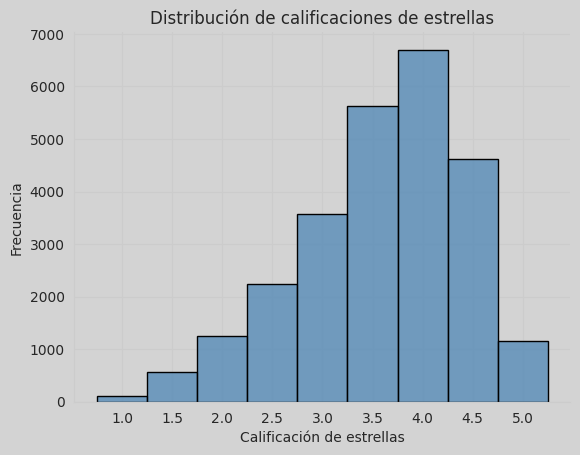

In [18]:
# Se configura el estilo de la cuadrícula y la paleta de colores
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Se configurar el color de fondo del gráfico
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Luego se crear un histograma utilizando Seaborn
sns.histplot(data=df_business, x='stars', bins=5, edgecolor='black', color='steelblue', alpha=0.7)

# Para posteriormente configurar etiquetas y título del gráfico
plt.xlabel('Calificación de estrellas')
plt.ylabel('Frecuencia')
plt.title('Distribución de calificaciones de estrellas')

# Se eliminan los bordes del gráfico
sns.despine()

# Y por ultimo se muestra el gráfico
plt.show()

**Realmente, la conclusión que se muestra en este gráfico es muy concisa. Se puede apreciar que la mayor cantidad de calificaciones en este caso se concentran dentro del rango de 3.5 a 5 estrellas. La cantidad de calificaciones de 1 a 2 estrellas es relativamente baja en comparación con el resto de la muestra. Además, como punto adicional, se puede observar una clara tendencia por parte de los usuarios a calificar los restaurantes con más de 3.5 estrellas pero menos de 4.5 estrellas, mostrando cierta reluctancia a otorgar calificaciones de 4.5 estrellas o más a los restaurantes.**

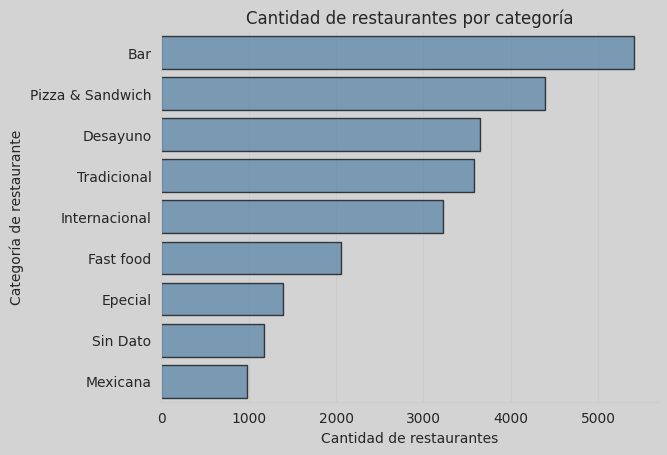

In [19]:
# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Color de fondo
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Cantidad de restaurantes en cada categoría
restaurant_count = df_business['rest_category'].value_counts()

# Gráfico de barras horizontales utilizando Seaborn
sns.barplot(y=restaurant_count.index, x=restaurant_count.values, color='steelblue', alpha=0.7, edgecolor='black')

# Etiquetas y título del gráfico
plt.xlabel('Cantidad de restaurantes')
plt.ylabel('Categoría de restaurante')
plt.title('Cantidad de restaurantes por categoría')

# Eliminar bordes del gráfico
sns.despine()

# Mostrar el gráfico
plt.show()

**Con este gráfico, podemos observar la distribución de la cantidad de restaurantes según su tipo. En este caso, los bares son los que están presentes en mayor cantidad dentro del conjunto de datos, seguidos por los restaurantes de tipo Pizza & Sandwich. Completando el top 3, se encuentran los restaurantes de desayuno, que tienen una cantidad similar a los restaurantes tradicionales. Cabe resaltar que la columna "sin dato" representa a los restaurantes que no tenían suficiente información en este campo para ser clasificados en un tipo específico. En la mayoría de los casos, estos presentaban el valor "Restaurante" en lugar de un tipo específico que permitiera su correcta clasificación.**

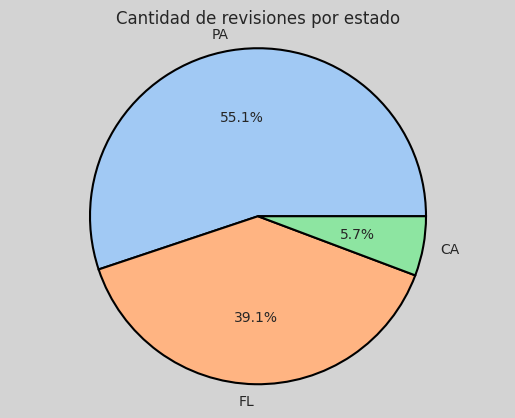

In [20]:
# Primero se configurar el estilo de la cuadrícula y la paleta de colores
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Luego se configurar el color de fondo del gráfico
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Se hace el calculo del número de revisiones por estado
reviews_by_state = df_business['state'].value_counts()

# Para crear un gráfico de pastel utilizando Seaborn
plt.pie(reviews_by_state.values, labels=reviews_by_state.index, autopct='%1.1f%%', colors=sns.color_palette(), 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Se configurar el título del gráfico
plt.title('Cantidad de revisiones por estado')

# Hacemos que el gráfico de pastel sea circular
plt.axis('equal')

plt.show()


**Este gráfico de tipo pastel representa de manera perfecta las proporciones que ocupan la cantidad de restaurantes en cada estado dentro de nuestro conjunto de datos. Como primera observación, notamos que Pensilvania es el estado con más restaurantes expuestos en el dataset, ocupando aproximadamente el 55% de todos los registros. Le sigue Florida, y finalmente California, que tiene apenas menos de una décima parte de la cantidad que tiene Pensilvania.**

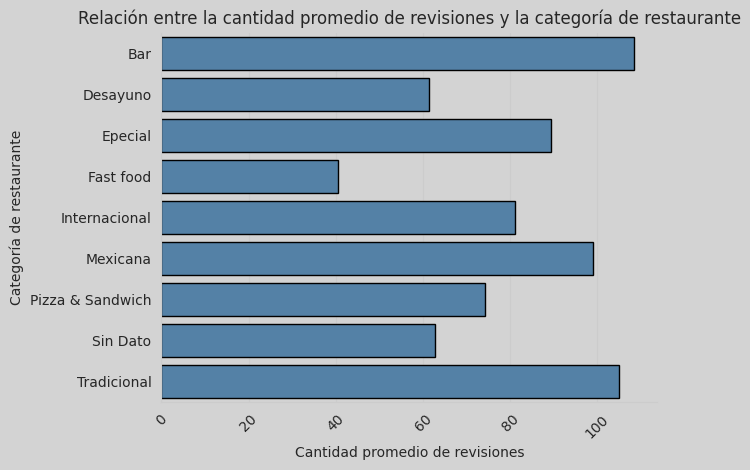

In [26]:
# Primero se configurar el estilo de la cuadrícula y la paleta de colores
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Luego se configurar el color de fondo del gráfico
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Se hace el calculo promedio del número de revisiones por categoria de restaurante
reviews_by_category = df_business.groupby('rest_category')['num_of_reviews'].mean()

# Gráfico de barras utilizando Seaborn con el mismo estilo de colores
ax = sns.barplot(x=reviews_by_category.values, y=reviews_by_category.index, color='steelblue')

# Se coonfigurar etiquetas y título del gráfico
plt.xlabel('Cantidad promedio de revisiones')
plt.ylabel('Categoría de restaurante')
plt.title('Relación entre la cantidad promedio de revisiones y la categoría de restaurante')
plt.xticks(rotation=45)

# Añadir bordes negros a las barras
for container in ax.containers:
    plt.setp(container, edgecolor='black')

# Y por ultomo eliminar los bordes del gráfico
sns.despine()

plt.show()

**Podemos notar que en promedio los restaurantes con mayor cantidad de revisiones son los tradicionales, seguidos por la comida mexicana y los bares, mientras que el tipo de restaurn¿ante con menor cantidad de revisiones en promedio con los de comidas rapidas, lo cual es curioso por algo que veremos mas adelante en el analisis**

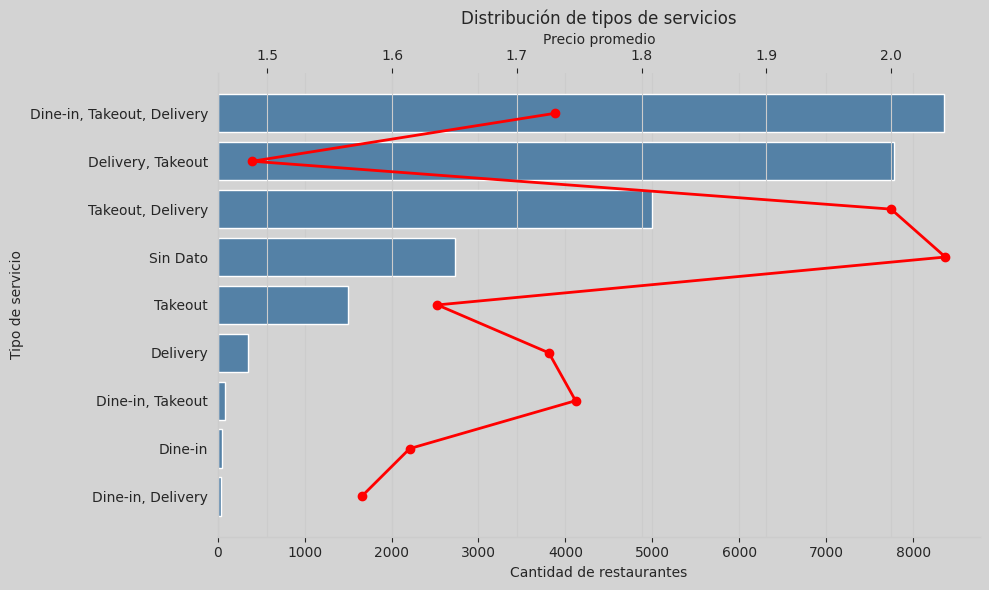

In [27]:
# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Color de fondo
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Cantidad de restaurantes que ofrecen cada tipo de servicio
service_count = df_business['service'].value_counts()

# Gráfico de barras horizontal utilizando Seaborn
sns.barplot(x=service_count.values, y=service_count.index, color='steelblue')

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Cantidad de restaurantes')
ax.set_ylabel('Tipo de servicio')
ax.set_title('Distribución de tipos de servicios')

# Precio promedio por tipo de servicio
average_price = df_business.groupby('service')['price_num'].mean()

# Gráfico de líneas utilizando Matplotlib para mostrar la relación entre la distribución y el precio promedio
ax2 = ax.twiny()
ax2.plot(average_price.values, np.arange(len(average_price)), color='red', marker='o', linewidth=2)

# Configurar etiquetas del eje secundario
ax2.set_xlabel('Precio promedio')

# Ajustar límites del eje y
ax.set_ylim(ax2.get_ylim())

# Eliminar bordes del gráfico
sns.despine()

# Ajustar los espacios entre los subplots
fig.tight_layout()

plt.show()

**En este grafico se muestra un poco toda la informacion expuesta durante el analisis de una manera mas unificada puesto que en cada punto tendremos la oportunidad de visualizar el tipo de servicio que tiene el restaurante, el precio promedio que tiene este organizado de 1 a 5 donde 1 es muy bajo y 5 es muy caro y la cantidad de restaurantes de este tipo de servicio  que tiene nuestro dataset, podemos observar que la mayor cantidad de restaurantes esta contenida en las categorias de takeout y delivery y que el precio promedio mas alto lo tienen los restaurantes que mezclan junto con esas categorias eñ servicio de dine-in**

## **Analisis de la tabla "checkin"**

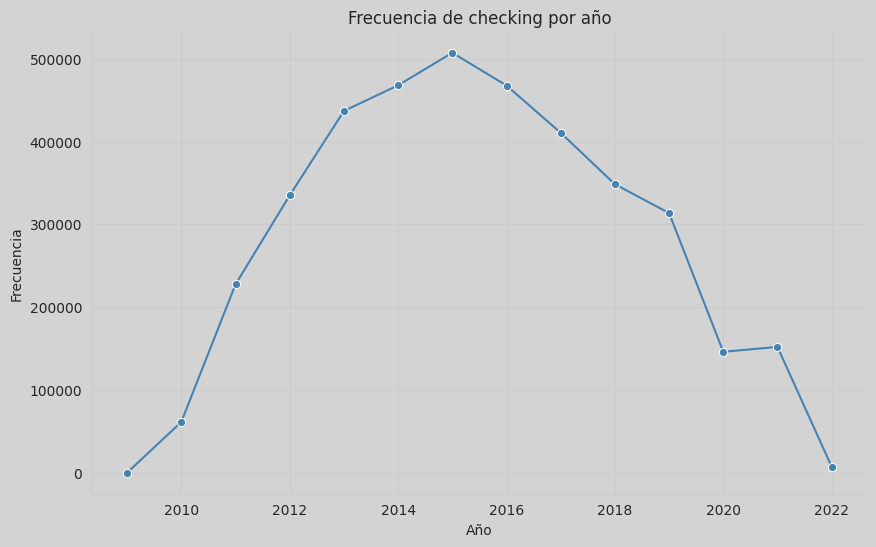

In [29]:
# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Color de fondo
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Extraer el año de la columna "date"
df_checkin['year'] = df_checkin['date'].dt.year

# Graficar la frecuencia por año
year_counts = df_checkin['year'].value_counts().sort_index()

# Crear la figura y el subplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=year_counts, marker='o', color='steelblue')

# Configurar etiquetas y título del gráfico de año
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de checking por año')

# Eliminar bordes del gráfico
sns.despine()

plt.show()

**Podemos apreciar claramente cómo el "checking" muestra un incremento muy acelerado desde el año 2009 hasta alcanzar su punto máximo en el año 2015. Posteriormente, comienza a caer considerablemente rápido hasta el año 2019. Luego, experimenta una caída abrupta en el año 2020 debido a las cuarentenas y restricciones impuestas por la pandemia. Incrementa ligeramente en el año 2021, pero vuelve a caer en picada en el año 2022.**

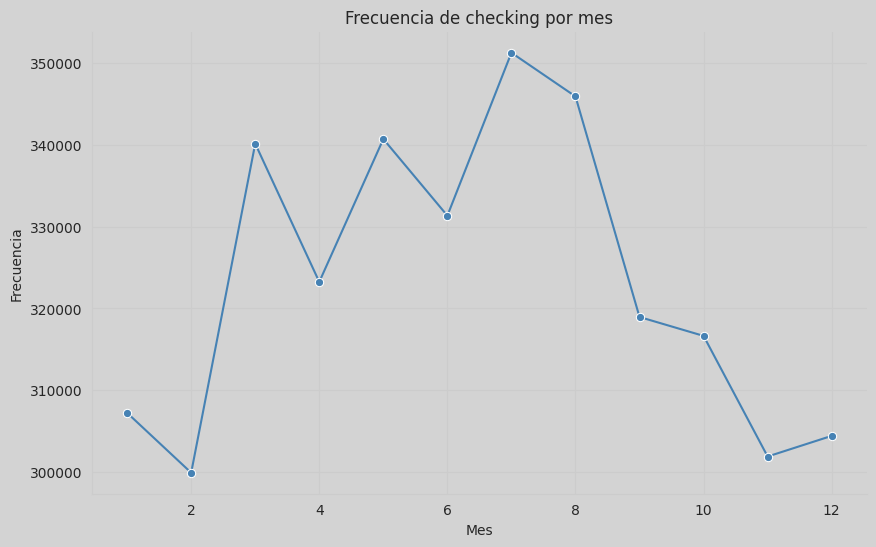

In [30]:
# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Color de fondo
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Extraer el mes de la columna "date"
df_checkin['month'] = df_checkin['date'].dt.month

# Graficar la frecuencia por mes
month_counts = df_checkin['month'].value_counts().sort_index()

# Crear la figura y el subplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=month_counts, marker='o', color='steelblue')

# Configurar etiquetas y título del gráfico de mes
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de checking por mes')

# Eliminar bordes del gráfico
sns.despine()

plt.show()

**En este caso, realizamos un análisis similar, pero esta vez desglosado por mes en lugar de por años. Podemos observar claramente un pico entre los meses 6 y 8, que coinciden con los meses en los que las escuelas en Estados Unidos tienen un receso debido al cambio de curso académico.**

## **Analisis de la tabla "reviews"**

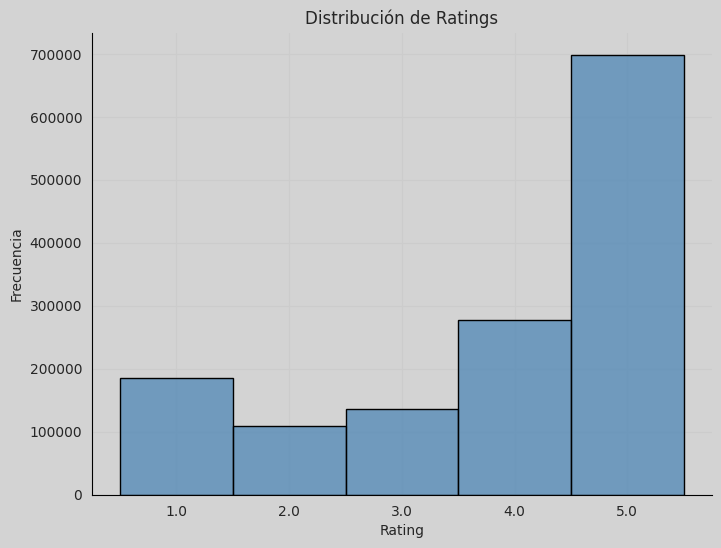

In [31]:
# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Color de fondo
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df_reviews, x='rating', bins=10, color='steelblue', edgecolor='black', alpha=0.7)

# Configurar etiquetas y título del gráfico
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')

# Eliminar bordes del gráfico
sns.despine()

# Configurar bordes negros de las barras
for _, spine in ax.spines.items():
    spine.set_color('black')    


plt.show()

**En este gráfico, podemos apreciar otra cara de la moneda de las opiniones de Yelp. Anteriormente, habíamos observado una baja tendencia a calificar con 5 estrellas a un restaurante. Sin embargo, ahora, con un dataset mucho más amplio, podemos apreciar todo lo contrario.**

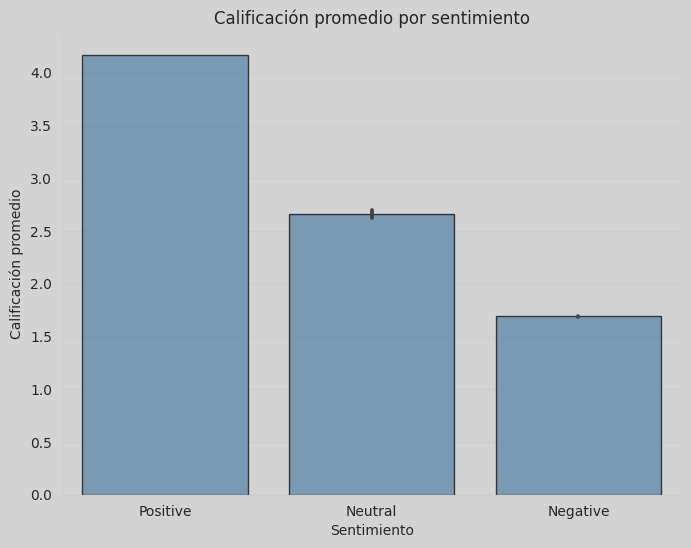

In [37]:
# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Color de fondo
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Gráfico de barras utilizando Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_reviews, x='feeling', y='rating', order=['Positive', 'Neutral', 'Negative'], color='steelblue', alpha=0.7)

# Configurar etiquetas y título del gráfico
plt.xlabel('Sentimiento')
plt.ylabel('Calificación promedio')
plt.title('Calificación promedio por sentimiento')

# Eliminar bordes del gráfico
sns.despine()

# Configurar bordes negros de las barras
for container in ax.containers:
    plt.setp(container, edgecolor='black')

plt.show()

**Aquí podemos apreciar de manera bastante clara cómo se distribuyen los sentimientos a lo largo de todos los comentarios del dataset. Se puede observar que los comentarios positivos superan ligeramente en cantidad a los comentarios negativos, y además existe un alto grado de imparcialidad debido a la cantidad de comentarios neutrales presentes.**

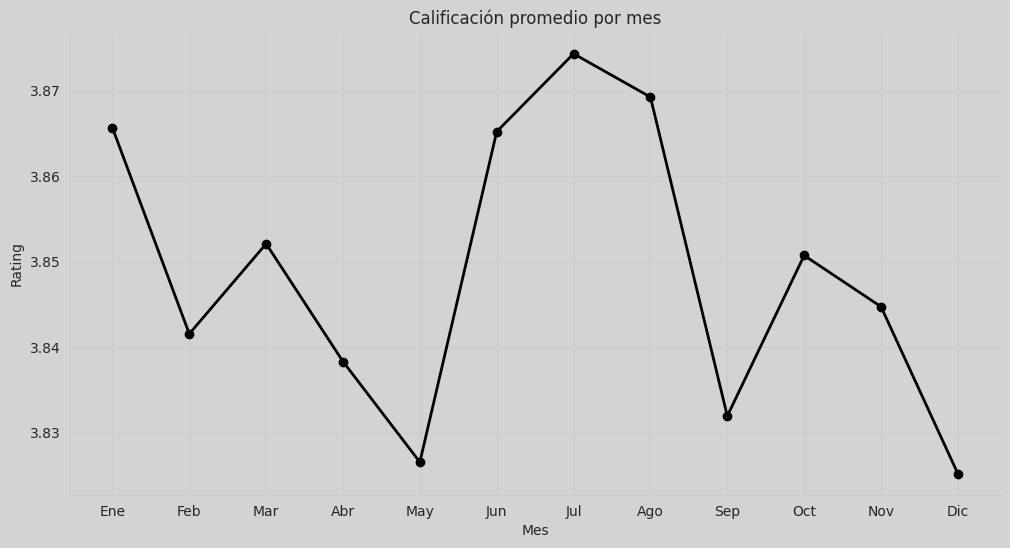

In [38]:
# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Color de fondo
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Convertir columna de fecha a tipo datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Ordenar el dataframe por fecha
df_sorted = df_reviews.sort_values(by='date')

# Obtener el mes de cada fecha
df_sorted['month'] = df_sorted['date'].dt.month

# Agrupar por mes y calcular el promedio de las calificaciones
df_grouped = df_sorted.groupby('month')['rating'].mean()

# Crear gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', color='black', linewidth=2)
plt.xlabel('Mes')
plt.ylabel('Rating')
plt.title('Calificación promedio por mes')
plt.xticks(df_grouped.index, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Eliminar bordes del gráfico
sns.despine()

plt.show()

**En este gráfico, podemos observar que curiosamente las personas son más propensas a dar calificaciones más altas en promedio durante los meses de vacaciones. Sin embargo, en diciembre, el promedio de calificación disminuye considerablemente. Es importante tener en cuenta que estas variaciones son bastante pequeñas, oscilando solo entre un promedio de 3.82 y un máximo de 3.90. Este análisis es simplemente una curiosidad a tener en cuenta, mostrando que durante el período de vacaciones, las personas están un poco más dispuestas a calificar positivamente a un restaurante.**

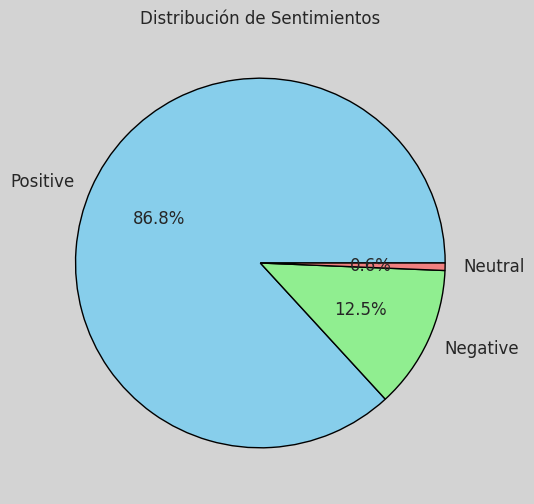

In [39]:
# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Configurar color de fondo
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

feeling_counts = df_reviews['feeling'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(feeling_counts, labels=feeling_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}, textprops={'fontsize': 12})
plt.title('Distribución de Sentimientos')

# Eliminar bordes del gráfico
sns.despine()

plt.show()

**En este caso, podemos apreciar la distribución general y el porcentaje que representa cada sentimiento dentro de nuestro dataset. Se muestra de manera amplia y clara que el sentimiento más representativo es el positivo, ocupando la mayor proporción dentro del conjunto de datos.**

<Figure size 1200x800 with 0 Axes>

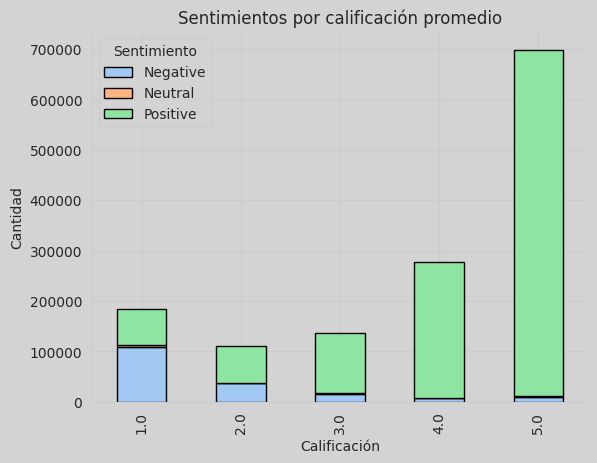

In [40]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Color de fondo
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

rating_feeling_counts = df_reviews.groupby(['rating', 'feeling']).size().unstack()

plt.figure(figsize=(12, 8))
ax = rating_feeling_counts.plot(kind='bar', stacked=True, edgecolor='black')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.title('Sentimientos por calificación promedio')

# Eliminar bordes del gráfico
sns.despine()

ax.legend(title='Sentimiento')
plt.show()

**Aquí podemos apreciar la proporción exacta que ocupa cada sentimiento dentro de las calificaciones. Notamos que incluso dentro de las calificaciones más bajas, hay una presencia considerable de comentarios positivos. Por lo tanto, preferimos considerar este análisis como una simple descripción literal de lo que se encuentra representado dentro del dataset, sin sacar conclusiones demasiado concluyentes debido a la naturaleza mencionada anteriormente.**

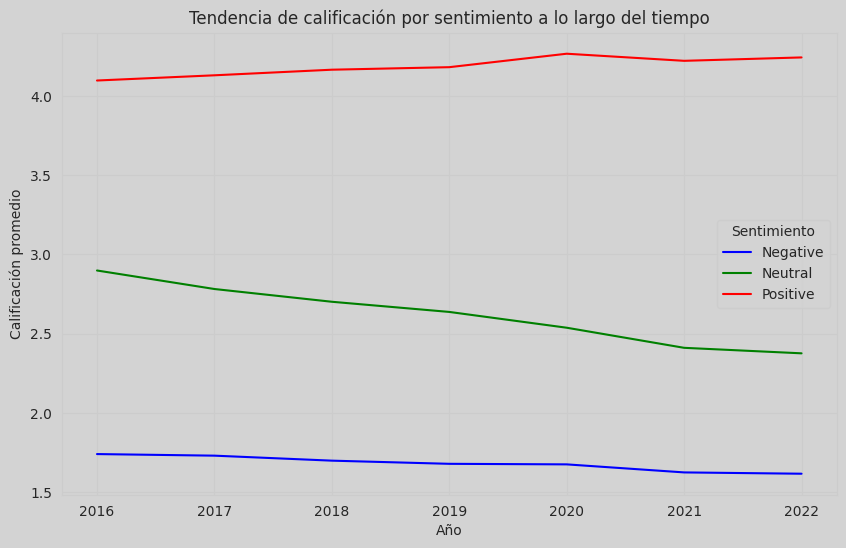

In [42]:
df_reviews['year'] = df_reviews['date'].dt.year
df_pivot = df_reviews.pivot_table(index='year', columns='feeling', values='rating', aggfunc='mean')
colors = ['blue', 'green', 'red'] 

df_pivot.plot(kind='line', figsize=(10, 6), color=colors)
plt.xlabel('Año')
plt.ylabel('Calificación promedio')
plt.title('Tendencia de calificación por sentimiento a lo largo del tiempo')
plt.legend(title='Sentimiento')
plt.show()


**Por último, aquí podemos apreciar un vistazo general de cómo disminuyen gradualmente los comentarios neutrales y negativos. Este decremento indica que el incremento de las reseñas positivas seguirá en aumento a medida que pase el tiempo, a menos que ocurra algún acontecimiento extraordinario que pueda alterar esta tendencia.**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ca2c531-2c35-4d05-9a2b-e87fc781f84f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>